# Modelling and Evaluating

## Objectives

* Answer business requirement 2:
* The client is interested to tell wheterh a given leaf is covered with powdery mildew

## Inputs

* image shape embeddings (.pkl file)
* Images from the test, train, validation folders and their subfolders.

* inputs/cherryleaves_dataset/cherry-leaves/train
* inputs/cherryleaves_dataset/cherry-leaves/validation
* inputs/cherryleaves_dataset/cherry-leaves/test

## Outputs

* Visualizations:
    * Distribution plots for images in train, validation, and test sets.
    * Bar chart for label distribution.
    * Pie chart for set distribution (percentages).
* Image Augmentation:
    * Apply augmentation techniques.
    * Plot augmented images for each set.
* Data Preparation:
    * Map class indices for prediction inference in labels.
* Model Creation and Training:
    * Create a machine learning model and display its summary.
    * Train the model and save it.
* Plot learning curves for model performance
* Model Evaluation:
    * Evaluate the model on saved files:
        * Calculate accuracy.
* Calculate classification report:
    * Plot confusion matrix.
    * Save evaluation results in a .pkl file.
* Prediction:
    * Perform prediction on a random image file.

# Comments | Insights | Conclusions

* The same data was plotted in different versions to accomodate possible client's requests of further data understanding.
* The CNN was built seeking maximise accuracy while minimizing loss and training time.
* The CNN was kept as small as possible withouth compromising accuracy and avoiding overfitting.
* More about hyperparameters optimization and trial and error phase is documented in the readme.md file and in a separate .pdf file.

## Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from matplotlib.image import imread

## Set working directory

In [2]:
cwd = os.getcwd()

In [4]:
os.chdir('/workspace/mildew-detector')
print("You set a new current directory")

You set a new current directory


In [5]:
work_dir = os.getcwd()
work_dir

'/workspace/mildew-detector'

## Set input directories

Set train, validation and test paths

In [6]:
my_data_dir = 'inputs/cherryleaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train' 
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directory

In [7]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set Labels

In [8]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'powdery_mildew']


## Set image shape

In [9]:
import joblib

version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

# Image Distrubtion

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




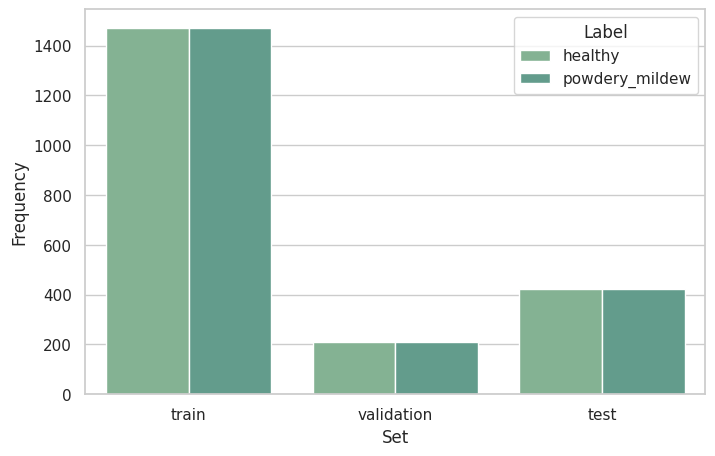

<Figure size 800x500 with 0 Axes>

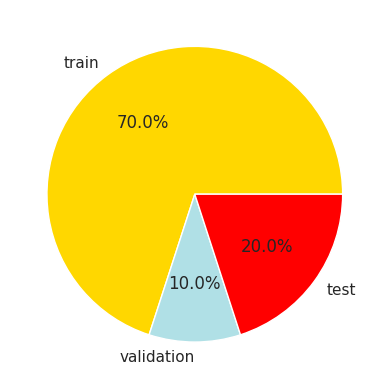

In [10]:
df_freq = pd.DataFrame([]) 
for folder in ['train', 'validation', 'test']:
  for label in labels:
    df_freq = df_freq.append(
        pd.Series(data={'Set': folder,
                        'Label': label,
                        'Frequency':int(len(os.listdir(my_data_dir+'/'+ folder + '/' + label)))}
                  ),
                  ignore_index=True
        )
    
    print(f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_theme(style="whitegrid", palette="crest") 
# sns.set_style("whitegrid") 
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')   
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show() 

plt.figure(figsize=(8,5))
labels = 'train', 'validation', 'test'
sizes = [70, 10, 20]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['gold', 'powderblue', 'red']) 
plt.savefig(f'{file_path}/labels_pie.png', bbox_inches='tight', dpi=150) 

# Image data augmentation

## Import ImageDataGenerator

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Initialize ImageDataGenerator

In [13]:
augmented_image_data = ImageDataGenerator(rotation_range=30,
                                          width_shift_range=0.15,
                                          height_shift_range=0.15,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          brightness_range=[0.8, 1.2],
                                          channel_shift_range=50.0,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

### Set a Batch size

In [14]:
batch_size = 20

## Augment training image dataset

In [22]:
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices 

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Augment validation image dataset

In [15]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices 

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Augment test image dataset

In [19]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices 

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Plot augmented training image

(20, 256, 256, 3)


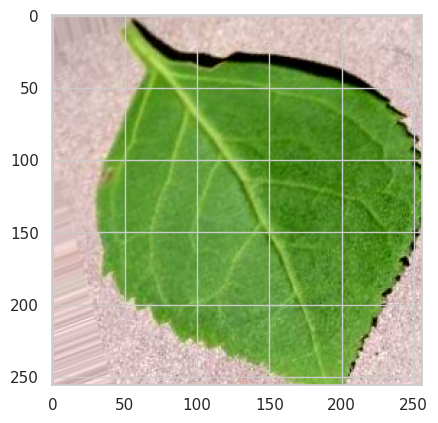

(20, 256, 256, 3)


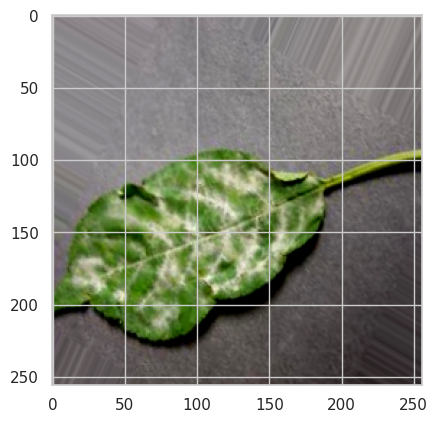

(20, 256, 256, 3)


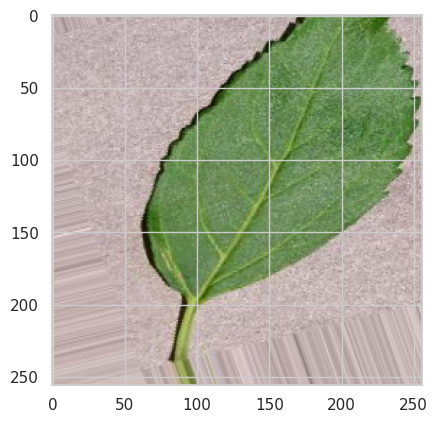

In [23]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape) 
    plt.imshow(img[0])
    plt.show()  

## Plot augmented validation and test images

(20, 256, 256, 3)


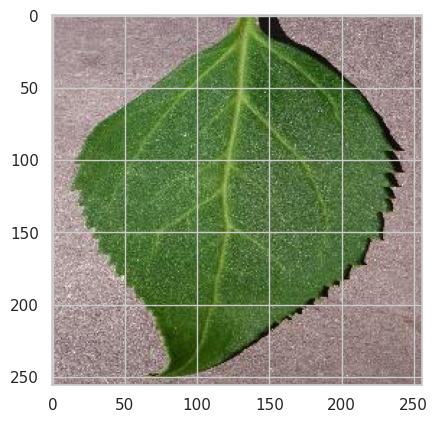

(20, 256, 256, 3)


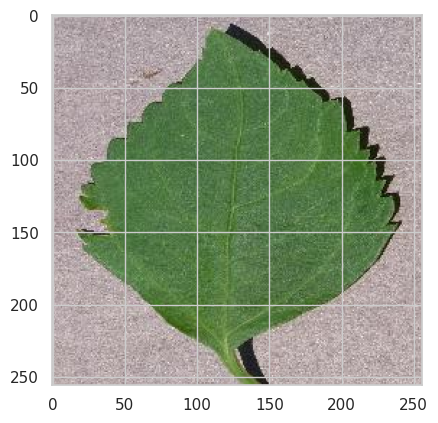

(20, 256, 256, 3)


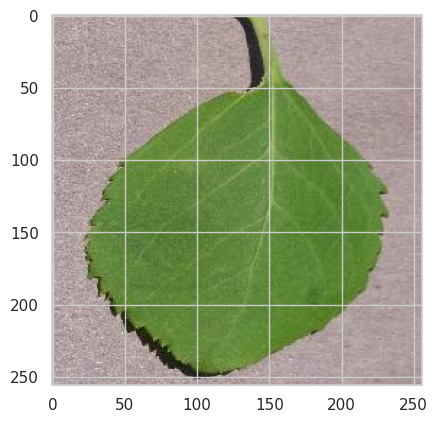

In [24]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)   
    plt.imshow(img[0])
    plt.show() 

(20, 256, 256, 3)


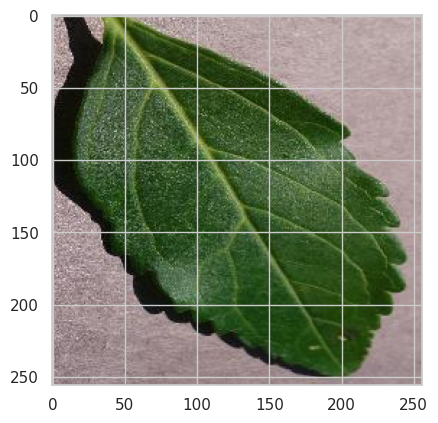

(20, 256, 256, 3)


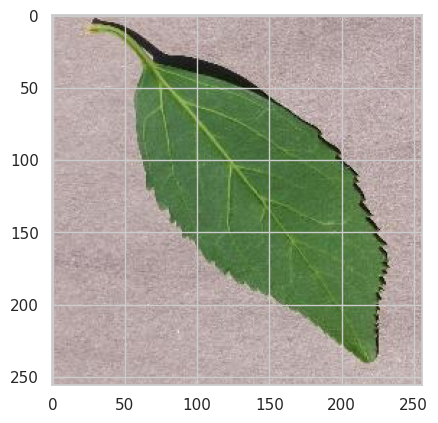

(20, 256, 256, 3)


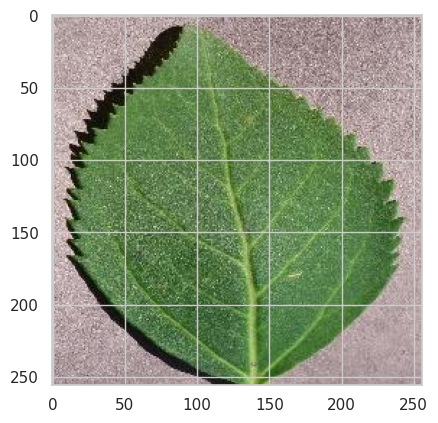

In [25]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)  
    plt.imshow(img[0])
    plt.show()

## Save class_indices

In [26]:
joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

# Model creation

## Import model packages

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

## Model

In [61]:
def image_tf_model():
    
    model = Sequential()
    
    # Convolutional layers 
    model.add(Conv2D(filters=32, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=128, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten layer
    model.add(Flatten()) 

    # Dense layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

## Model Summary

In [62]:
image_tf_model().summary() 


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 115200)          

## Early Stopping

## Fit model for training

## Save model

## Model Performance

### Model learining curve

## Model Evaluation

### Import saved model

## Evaluate model on test set

## F1 Score

## Save evaluation PKL

# Predict on new data

Load random image as PIL

### Convert image to array and prepare for prediction

### Predict class probabilities